# California housing dataset


**Random forest**
- Since it's an ensemble model, the number of estimators can be altered
- Scaling must be performed on training and testinf seperately. 'score' helps scaling the test data and using a suitable metric for evaluating the model.
- Random forest can be used for classification as well as regression
- to convert numpy array to df
      df.Dataframe('numpy_array')
- to convert df to numpy array
      df.values


Random Forest's ability to handle different distributions in the training and test data, combined with its robustness to feature scaling and ensemble averaging, enables it to produce good results even when the data is scaled differently for training and testing.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import r2_score
import torch

In [2]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Analyze data

Data is pre-processed as follows:
*   The data is cleaned by imputing missing values (if any) by using strategies like median, mean, z-score and so on
*   Categorical data is converted to numerical through one-hot encoding.
*   Scale the data to normalize the features
*   Univariate and multivariate understanding of data is visualized through charts and graphs
    

    1.   Uni-variate - histograms
    2.   Bi-variate - correlation, heat-map
    3.   Multi-variate - PCA, Multi-Dimnsional Scaling, t-SNE


*   Peform feature extraction if necessary
*   Split the data - Stratified sampling, Random sapling






In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

On encountering missing values, impute


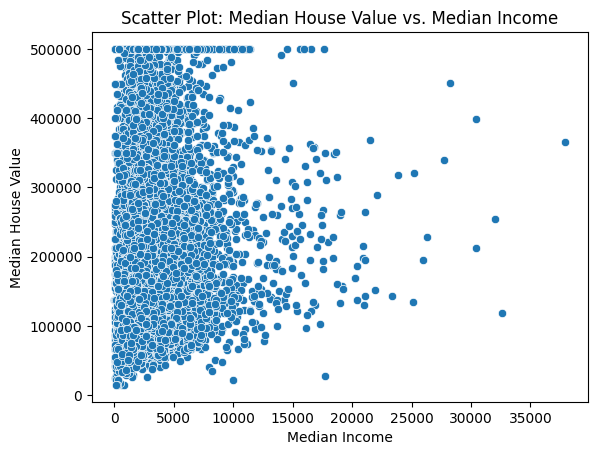

In [6]:
sns.scatterplot(x=df['total_rooms'], y=df['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter Plot: Median House Value vs. Median Income')
plt.show()


## Data Augmentation

In [7]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df_test['rooms_per_household'] = df_test['total_rooms'] / df_test['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df_test['bedrooms_per_room'] = df_test['total_bedrooms'] / df_test['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df_test['population_per_household'] = df_test['population'] / df_test['households']


Perform data splitting

In [8]:
X_train = df.drop('median_house_value', axis=1)
y_train = df['median_house_value']
X_test = df_test.drop('median_house_value', axis=1)
y_test = df_test['median_house_value']

In [9]:
X_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.032894,0.096272,0.028951
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,0.110017,-0.115957,-0.032784
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,-0.146234,0.133441,0.006274
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.125385,-0.182914,-0.035327
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,-0.006480,0.094690,-0.043553
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.074806,0.042546,0.076362
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,-0.084505,0.074662,-0.040084
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.317311,-0.617638,-0.009826
rooms_per_household,-0.032894,0.110017,-0.146234,0.125385,-0.006480,-0.074806,-0.084505,0.317311,1.000000,-0.408200,0.001476
bedrooms_per_room,0.096272,-0.115957,0.133441,-0.182914,0.094690,0.042546,0.074662,-0.617638,-0.408200,1.000000,-0.010606


Scale the values to make mean zero and variance 1

In [10]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Covariance is not scaled and its value depends on the scales of the variables being measured. Therefore, it may not be directly interpretable without considering the scales of the variables.
Correlation is scaled between -1 and 1, where -1 indicates a perfect negative linear relationship, 1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship. This makes correlation interpretable and comparable across different datasets, regardless of the scales of the variables

In [11]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04
mean,-6.633961e-15,2.674984e-17,-7.606987e-17,-9.028072e-17,-8.693699e-17,7.356207e-17,2.006238e-17,-3.644666e-16,1.069994e-16,1.354211e-16,-7.314411e-17
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.387848e+00,-1.443531e+00,-2.191968e+00,-1.211838e+00,-1.277408e+00,-1.242856e+00,-1.300935e+00,-1.773323e+00,-1.808851e+00,-1.950146e+00,-5.656730e-01
25%,-1.111108e+00,-7.931704e-01,-8.413218e-01,-5.420770e-01,-5.751323e-01,-5.572079e-01,-5.701340e-01,-6.903217e-01,-3.913832e-01,-6.520450e-01,-1.346622e-01
50%,5.346887e-01,-6.434471e-01,3.262582e-02,-2.370147e-01,-2.500927e-01,-2.287590e-01,-2.398431e-01,-1.776521e-01,-7.992447e-02,-1.697883e-01,-3.949382e-02
75%,7.790646e-01,9.801141e-01,6.682241e-01,2.328499e-01,2.582266e-01,2.538954e-01,2.705474e-01,4.629850e-01,2.438062e-01,4.688045e-01,7.506661e-02
max,2.619365e+00,2.959268e+00,1.859971e+00,1.619047e+01,1.401132e+01,2.984131e+01,1.451402e+01,5.825963e+00,5.374697e+01,1.361505e+01,1.237048e+02


In [12]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,2.540559,0.274246,-0.204549
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,4.365146,0.618055,-0.133217
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,0.281516,0.499931,-0.032242
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,0.473608,0.203333,-0.172765
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,0.043548,0.198008,-0.147276


In [13]:
corr_matrix = pd.DataFrame(X_train_scaled).corr()
display(corr_matrix)

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.032894,0.096272,0.028951
1,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,0.110017,-0.115957,-0.032784
2,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,-0.146234,0.133441,0.006274
3,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.125385,-0.182914,-0.035327
4,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,-0.006480,0.094690,-0.043553
5,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.074806,0.042546,0.076362
6,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,-0.084505,0.074662,-0.040084
7,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.317311,-0.617638,-0.009826
8,-0.032894,0.110017,-0.146234,0.125385,-0.006480,-0.074806,-0.084505,0.317311,1.000000,-0.408200,0.001476
9,0.096272,-0.115957,0.133441,-0.182914,0.094690,0.042546,0.074662,-0.617638,-0.408200,1.000000,-0.010606


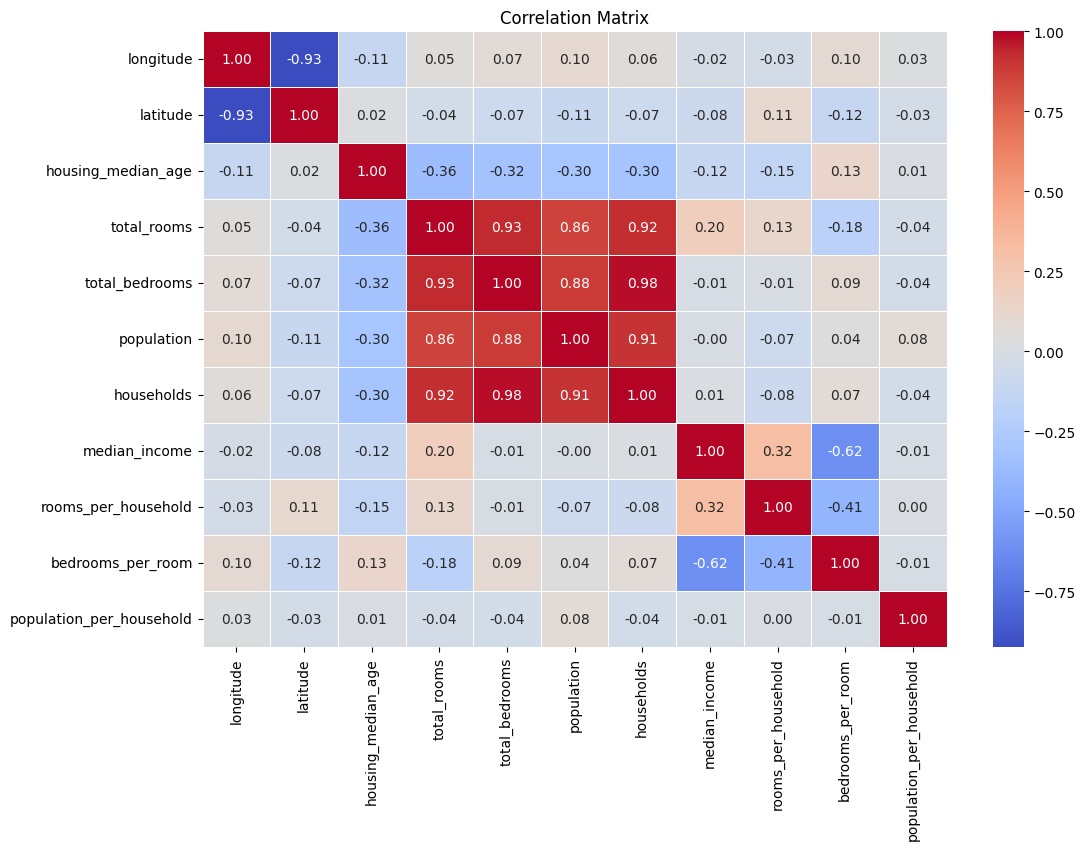

In [14]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, xticklabels= pd.DataFrame(X_train).columns, yticklabels=pd.DataFrame(X_train).columns)
plt.title('Correlation Matrix')
plt.show()


Note: Scaling has no effect on correlations

## Dimensionality Reduction:
1. SVD
2. PCA

In [15]:
pca = PCA(n_components=3)
PCA = pca.fit(X_train_scaled)
X_train_reduced = PCA.transform(X_train_scaled)
X_test_reduced = PCA.transform(X_test_scaled)

In [16]:
X_train_reduced.shape

(17000, 3)

In [17]:
display(X_train_reduced)

array([[ 1.76771695, -0.68787488,  1.90104899],
       [ 2.90689852,  0.06372076,  2.02211547],
       [-1.38321196, -1.92485568,  1.75644012],
       ...,
       [-0.35481267,  2.30962574, -2.87633356],
       [-0.341331  ,  1.92021031, -3.19121397],
       [-1.78897302,  2.15252132, -2.51185275]])

Since the dataset is not complex, dimensionality reduction would not improve the performance of the model

## Decision Tree

In [18]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=200, min_samples_split= 10)
clf.fit(X_train_scaled[:17000], y_train[:17000])

RandomForestRegressor(min_samples_split=10, n_estimators=200)

In [19]:
clf.score(X_test_scaled[:3000], y_test[:3000])

0.795607964124665

In [20]:
y_pred=clf.predict(X_test_scaled[:3000])

In [21]:
r2_score(y_test[:1000], y_pred[:1000])

0.80449448573761

In [22]:
clf.feature_importances_

array([0.0839345 , 0.08268899, 0.05055434, 0.00988018, 0.00926547,
       0.01044485, 0.00904801, 0.54788617, 0.02934657, 0.03439757,
       0.13255335])

In [23]:
df_test.columns[:-1]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room'],
      dtype='object')

## Feature importance plot

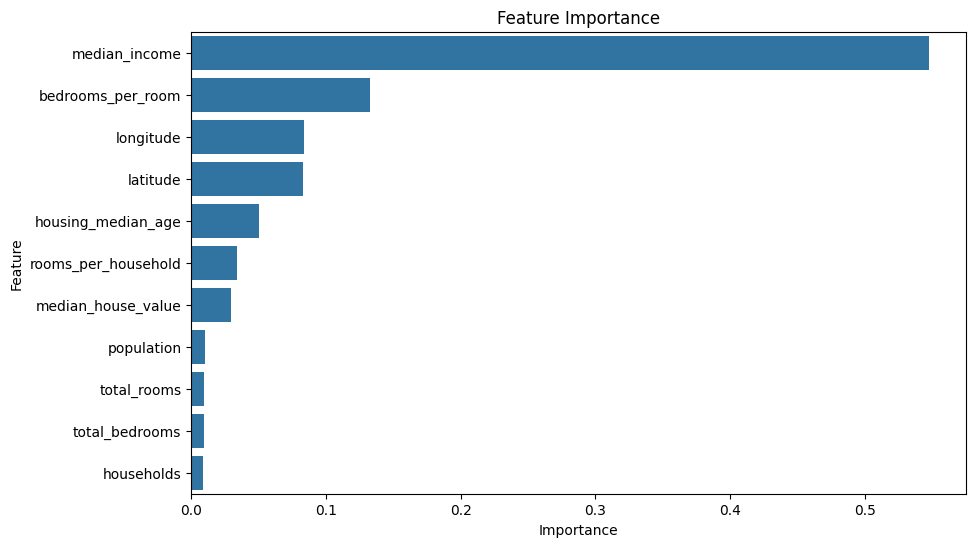

In [24]:
importances = clf.feature_importances_
features = df_test.columns[:-1]

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


GUI

In [25]:
pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00


In [38]:
import openai

# Initialize the OpenAI API client (replace 'your-api-key' with your actual OpenAI API key)
openai.api_key

def generate_image(description):
  response = client.images.generate(
  model="dall-e-3",
  prompt="a white siamese cat",
  size="1024x1024",
  quality="standard",
  n=1,
)
  image_url = response.data[0].url
  return image_url

# Function to create a description for the house based on inputs
def create_description(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income):
    description = (f"You are a real estate agent who specializes in selling houses. Generate an image of a house in california with "
                   f"{total_rooms} total rooms, "
                   f"{total_bedrooms} bedrooms, and can accomodate a population of atleast {population} people.")
    return description

from openai import OpenAI
client = OpenAI(api_key= )




In [36]:
# Create sliders for the inputs
longitude_slider = widgets.FloatSlider(min=-124.35, max=-114.31, step=0.01, description='Longitude')
latitude_slider = widgets.FloatSlider(min=32.54, max=41.95, step=0.01, description='Latitude')
housing_median_age_slider = widgets.IntSlider(min=1, max=52, step=1, description='Housing Median Age')
total_rooms_slider = widgets.IntSlider(min=1, max=40000, step=1, description='Total Rooms')
total_bedrooms_slider = widgets.IntSlider(min=1, max=7000, step=1, description='Total Bedrooms')
population_slider = widgets.IntSlider(min=1, max=35000, step=1, description='Population')
households_slider = widgets.IntSlider(min=1, max=6000, step=1, description='Households')
median_income_slider = widgets.FloatSlider(min=0.5, max=15.0, step=0.01, description='Median Income')

In [39]:
# Updating the prediction function to include image generation
def predict_and_generate_image(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income):
    # Get the values from the sliders
    total_rooms = total_rooms_slider.value
    total_bedrooms = total_bedrooms_slider.value
    population = population_slider.value
    households = households_slider.value

    # Augmented data
    rooms_per_household = total_rooms / households
    bedrooms_per_room = total_bedrooms / total_rooms
    population_per_household = population / households

    # Prediction
    prediction_data = pd.DataFrame([[longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, rooms_per_household, bedrooms_per_room, population_per_household]], columns=X_train.columns)
    input_data = scaler.transform(prediction_data)
    predicted_value = clf.predict(input_data)
    print(f'Predicted Median House Value: ${predicted_value[0]:.2f}')

    description = create_description(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income)
    image_url = generate_image(description)
    display(image_url)

# Displaying the widgets
display(longitude_slider, latitude_slider, housing_median_age_slider, total_rooms_slider, total_bedrooms_slider, population_slider, households_slider, median_income_slider, predict_button)

# Linking the button to the function
predict_button.on_click(lambda b: predict_and_generate_image(longitude_slider.value, latitude_slider.value, housing_median_age_slider.value, total_rooms_slider.value, total_bedrooms_slider.value, population_slider.value, households_slider.value, median_income_slider.value))


FloatSlider(value=-114.31, description='Longitude', max=-114.31, min=-124.35, step=0.01)

FloatSlider(value=32.54, description='Latitude', max=41.95, min=32.54, step=0.01)

IntSlider(value=1, description='Housing Median Age', max=52, min=1)

IntSlider(value=1, description='Total Rooms', max=40000, min=1)

IntSlider(value=1, description='Total Bedrooms', max=7000, min=1)

IntSlider(value=1, description='Population', max=35000, min=1)

IntSlider(value=1, description='Households', max=6000, min=1)

FloatSlider(value=0.5, description='Median Income', max=15.0, min=0.5, step=0.01)

Button(description='Predict', style=ButtonStyle())

ValueError: X has 8 features, but RandomForestRegressor is expecting 11 features as input.

ValueError: X has 8 features, but RandomForestRegressor is expecting 11 features as input.

Predicted Median House Value: $129317.56


BadRequestError: Error code: 400 - {'error': {'code': 'billing_hard_limit_reached', 'message': 'Billing hard limit has been reached', 'param': None, 'type': 'invalid_request_error'}}

Predicted Median House Value: $129317.56


BadRequestError: Error code: 400 - {'error': {'code': 'billing_hard_limit_reached', 'message': 'Billing hard limit has been reached', 'param': None, 'type': 'invalid_request_error'}}

Predicted Median House Value: $129317.56


BadRequestError: Error code: 400 - {'error': {'code': 'billing_hard_limit_reached', 'message': 'Billing hard limit has been reached', 'param': None, 'type': 'invalid_request_error'}}

Predicted Median House Value: $129317.56


BadRequestError: Error code: 400 - {'error': {'code': 'billing_hard_limit_reached', 'message': 'Billing hard limit has been reached', 'param': None, 'type': 'invalid_request_error'}}

In [ ]:
from re import X
# Create sliders for the inputs
longitude_slider = widgets.FloatSlider(min=-124.35, max=-114.31, step=0.01, description='Longitude')
latitude_slider = widgets.FloatSlider(min=32.54, max=41.95, step=0.01, description='Latitude')
housing_median_age_slider = widgets.IntSlider(min=1, max=52, step=1, description='Housing Median Age')
total_rooms_slider = widgets.IntSlider(min=1, max=40000, step=1, description='Total Rooms')
total_bedrooms_slider = widgets.IntSlider(min=1, max=7000, step=1, description='Total Bedrooms')
population_slider = widgets.IntSlider(min=1, max=35000, step=1, description='Population')
households_slider = widgets.IntSlider(min=1, max=6000, step=1, description='Households')
median_income_slider = widgets.FloatSlider(min=0.5, max=15.0, step=0.01, description='Median Income')



# Function to capture inputs and make predictions
def predict_price(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income):

    total_rooms = total_rooms_slider.value
    total_bedrooms = total_bedrooms_slider.value
    population = population_slider.value
    households = households_slider.value
    # Augmented data
    rooms_per_household = total_rooms / households
    bedrooms_per_room = total_bedrooms / total_rooms
    population_per_household = population / households

    # Prediction
    prediction_data = pd.DataFrame(np.array([[longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, rooms_per_household, bedrooms_per_room, population_per_household]]), columns = X_train.columns)
    input_data = scaler.transform(prediction_data)
    #input_data = np.array([[longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, rooms_per_household, bedrooms_per_room, population_per_household]])
    predicted_value = clf.predict(input_data)
    print(f'Predicted Median House Value: ${predicted_value[0]:.2f}')

# Button to trigger prediction
predict_button = widgets.Button(description='Predict')

# Displaying the widgets
display(longitude_slider, latitude_slider, housing_median_age_slider, total_rooms_slider, total_bedrooms_slider, population_slider, households_slider, median_income_slider, predict_button)

# Linking the button to the function
predict_button.on_click(lambda b: predict_price(longitude_slider.value, latitude_slider.value, housing_median_age_slider.value, total_rooms_slider.value, total_bedrooms_slider.value, population_slider.value, households_slider.value, median_income_slider.value))


Stable Diffusion (Text to Image)

In [ ]:
pip install diffusers --upgrade


In [ ]:
pip install invisible_watermark transformers accelerate safetensors


In [ ]:
from diffusers import StableDiffusionPipeline


In [ ]:
# Create sliders for the inputs
longitude_slider = widgets.FloatSlider(min=-124.35, max=-114.31, step=0.01, description='Longitude')
latitude_slider = widgets.FloatSlider(min=32.54, max=41.95, step=0.01, description='Latitude')
housing_median_age_slider = widgets.IntSlider(min=1, max=52, step=1, description='Housing Median Age')
total_rooms_slider = widgets.IntSlider(min=1, max=40000, step=1, description='Total Rooms')
total_bedrooms_slider = widgets.IntSlider(min=1, max=7000, step=1, description='Total Bedrooms')
population_slider = widgets.IntSlider(min=1, max=35000, step=1, description='Population')
households_slider = widgets.IntSlider(min=1, max=6000, step=1, description='Households')
median_income_slider = widgets.FloatSlider(min=0.5, max=15.0, step=0.01, description='Median Income')

# Load your trained model (assuming clf is your trained RandomForestRegressor)
# Load your scaler (assuming scaler is your trained StandardScaler)
# Example:
# clf = RandomForestRegressor().fit(X_train, y_train)
# scaler = StandardScaler().fit(X_train)

# Assuming you have your feature names from your training data
feature_names = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', 'rooms_per_household',
    'bedrooms_per_room', 'population_per_household'
]

# Load Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe = pipe.to("cpu")

# Function to capture inputs and make predictions
def predict_price_and_generate_image(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income):
    # Get the values from the sliders
    total_rooms = total_rooms_slider.value
    total_bedrooms = total_bedrooms_slider.value
    population = population_slider.value
    households = households_slider.value

    # Augmented data
    rooms_per_household = total_rooms / households
    bedrooms_per_room = total_bedrooms / total_rooms
    population_per_household = population / households

    # Prediction
    prediction_data = pd.DataFrame([[longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, rooms_per_household, bedrooms_per_room, population_per_household]], columns=feature_names)
    input_data = scaler.transform(prediction_data)
    predicted_value = clf.predict(input_data)
    print(f'Predicted Median House Value: ${predicted_value[0]:.2f}')

    # Create description for image generation
    description = (f"A house located at longitude {longitude} and latitude {latitude}, "
                   f"with a median housing age of {housing_median_age} years, {total_rooms} total rooms, "
                   f"{total_bedrooms} bedrooms, a population of {population}, {households} households, "
                   f"and a median income of ${median_income}.")

    # Generate image using Stable Diffusion
    image = pipe(description).images[0]
    display(image)

# Button to trigger prediction
predict_button = widgets.Button(description='Predict')

# Displaying the widgets
display(longitude_slider, latitude_slider, housing_median_age_slider, total_rooms_slider, total_bedrooms_slider, population_slider, households_slider, median_income_slider, predict_button)

# Linking the button to the function
predict_button.on_click(lambda b: predict_price_and_generate_image(longitude_slider.value, latitude_slider.value, housing_median_age_slider.value, total_rooms_slider.value, total_bedrooms_slider.value, population_slider.value, households_slider.value, median_income_slider.value))
